# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd

# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df.shape

(10841, 12)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [6]:
df.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10567,ES File Explorer File Manager,PRODUCTIVITY,4.60,5383985,16.00,"100,000,000",Free,0,Everyone,Productivity,"August 3, 2018",4.0 and up
2103,BD Field Force,PRODUCTIVITY,4.20,41,15.00,"1,000",Free,0,Everyone,Productivity,"August 1, 2018",4.3 and up
7925,SW Battlefront Companion,FAMILY,4.40,93870,79.00,"1,000,000",Free,0,Everyone,Strategy,"February 3, 2016",4.0 and up
9625,KIM KARDASHIAN: HOLLYWOOD,GAME,4.30,1017408,34.00,"10,000,000",Free,0,Teen,Adventure,"July 16, 2018",4.0 and up
2401,Radio K - KUOM,FAMILY,4.50,39,7.40,"1,000",Free,0,Everyone,Entertainment,"March 9, 2018",4.1 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [7]:
df.drop(['Last_Updated', 'Android_Ver'], axis = 1, inplace = True)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [8]:
len(df[df['Rating'].isnull() == True])

1474

In [9]:
len(df['Rating'].dropna())

9367

In [10]:
df.dropna(subset = 'Rating', inplace = True)

In [11]:
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [12]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating
...,...,...,...,...,...,...,...,...,...,...
10802,Skype - free IM & video calls,COMMUNICATION,4.10,10484169,3.50,"1,000,000,000",Free,0,Everyone,Communication
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10826,Google Drive,PRODUCTIVITY,4.40,2731211,4.00,"1,000,000,000",Free,0,Everyone,Productivity
10832,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines


In [13]:
df.drop_duplicates('App', inplace = True)

In [14]:
df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [15]:
df.sort_values('Rating', ascending = False)[['App', 'Rating']]

,App,Rating
21,KBA-EZ Health Guide,5.00
1230,Sway Medical,5.00
1227,AJ Men's Grooming,5.00
1224,FK Dedinje BGD,5.00
1223,CB VIDEO VISION,5.00
...,...,...
1721,Lottery Ticket Checker - Florida Results & Lotto,1.00
728,Truck Driving Test Class 3 BC,1.00
240,House party - live chat,1.00
1271,MbH BM,1.00


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [16]:
df.sort_values('Size_MBs', ascending = False)[['App', 'Size_MBs']]

,App,Size_MBs
9942,Talking Babsy Baby: Baby Games,100.00
10687,Hungry Shark Evolution,100.00
9943,Miami crime simulator,100.00
9944,Gangster Town: Vice District,100.00
3144,Vi Trainer,100.00
...,...,...
5798,ExDialer PRO Key,0.02
2648,Ad Remove Plugin for App2SD,0.02
2684,My baby firework (Remove ad),0.01
7966,Market Update Helper,0.01


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [17]:
df.sort_values('Reviews', ascending = False)[['App', 'Reviews', 'Price']].head()

,App,Reviews,Price
10805,Facebook,78158306,0
10785,WhatsApp Messenger,69119316,0
10806,Instagram,66577313,0
10784,Messenger – Text and Video Chat for Free,56642847,0
10650,Clash of Clans,44891723,0


In [18]:
df.sort_values('Reviews', ascending = False)['Price'].head(50).loc[lambda x: x != '0']

Series([], Name: Price, dtype: object)

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [19]:
import plotly.express as px

In [20]:
px.pie(values = df['Content_Rating'].value_counts(), title = 'Content Rating',
names = df['Content_Rating'].value_counts().index).update_traces(
textinfo = 'label+percent', textposition = 'outside')

In [21]:
px.pie(values = df['Content_Rating'].value_counts(), title = 'Content Rating', hole = 0.5,
names = df['Content_Rating'].value_counts().index).update_traces(textfont_size = 15, textposition = 'inside')

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [22]:
type(df['Installs'].iloc[0])

str

In [23]:
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',', '')))

In [24]:
df['Installs'].loc[lambda x: x >= 1000000000].count()

20

In [25]:
df['Installs'].loc[lambda x: x == 1].count()

3

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [26]:
type(df['Price'].iloc[0])

str

In [27]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')))

In [28]:
df.drop(index = df['Price'].loc[lambda x: x > 250].index, inplace = True)

In [29]:
df['Revenue_Estimate'] = df['Price'] * df['Installs']

### The most expensive apps sub $250

In [30]:
df.sort_values('Price', ascending = False).head()[['App', 'Price']]

,App,Price
2281,Vargo Anesthesia Mega App,79.99
1407,LTC AS Legal,39.99
2629,I am Rich Person,37.99
2481,A Manual of Acupuncture,33.99
504,AP Art History Flashcards,29.99


### Highest Grossing Paid Apps (ballpark estimate)

In [31]:
df.sort_values('Revenue_Estimate', ascending = False).head()[['App', 'Revenue_Estimate']]

,App,Revenue_Estimate
9220,Minecraft,"69,900,000.00"
8825,Hitman Sniper,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,"6,990,000.00"
7477,Facetune - For Free,"5,990,000.00"
7977,Sleep as Android Unlock,"5,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

<Axes: ylabel='Category'>

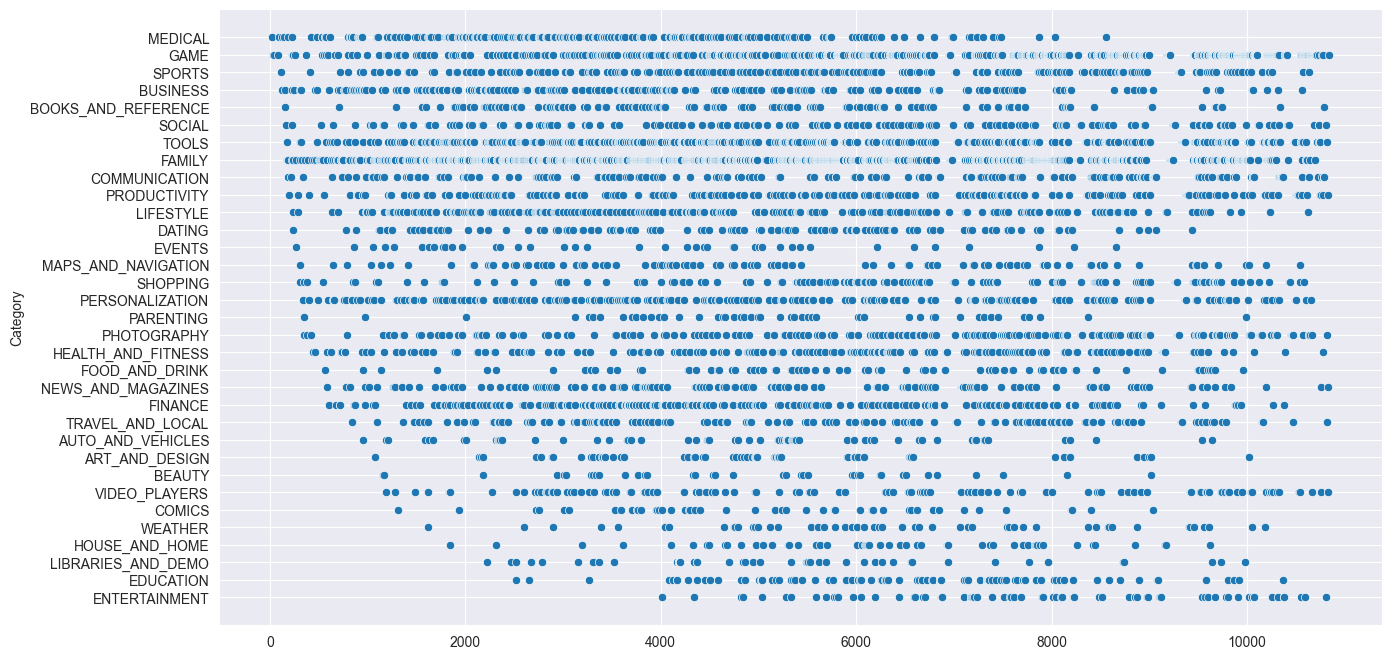

In [33]:
plt.figure(figsize = (15, 8))
sns.scatterplot(df['Category'])

### Vertical Bar Chart - Highest Competition (Number of Apps)

<Axes: xlabel='Category', ylabel='Count'>

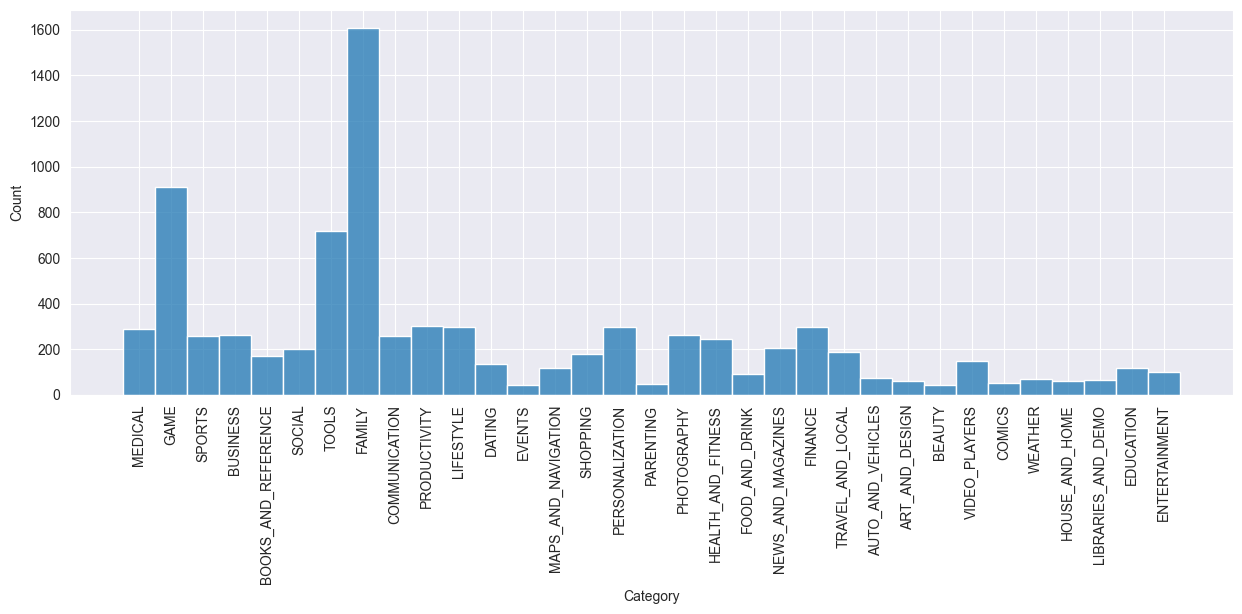

In [34]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.histplot(df['Category'])

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

<Axes: xlabel='Installs', ylabel='Category'>

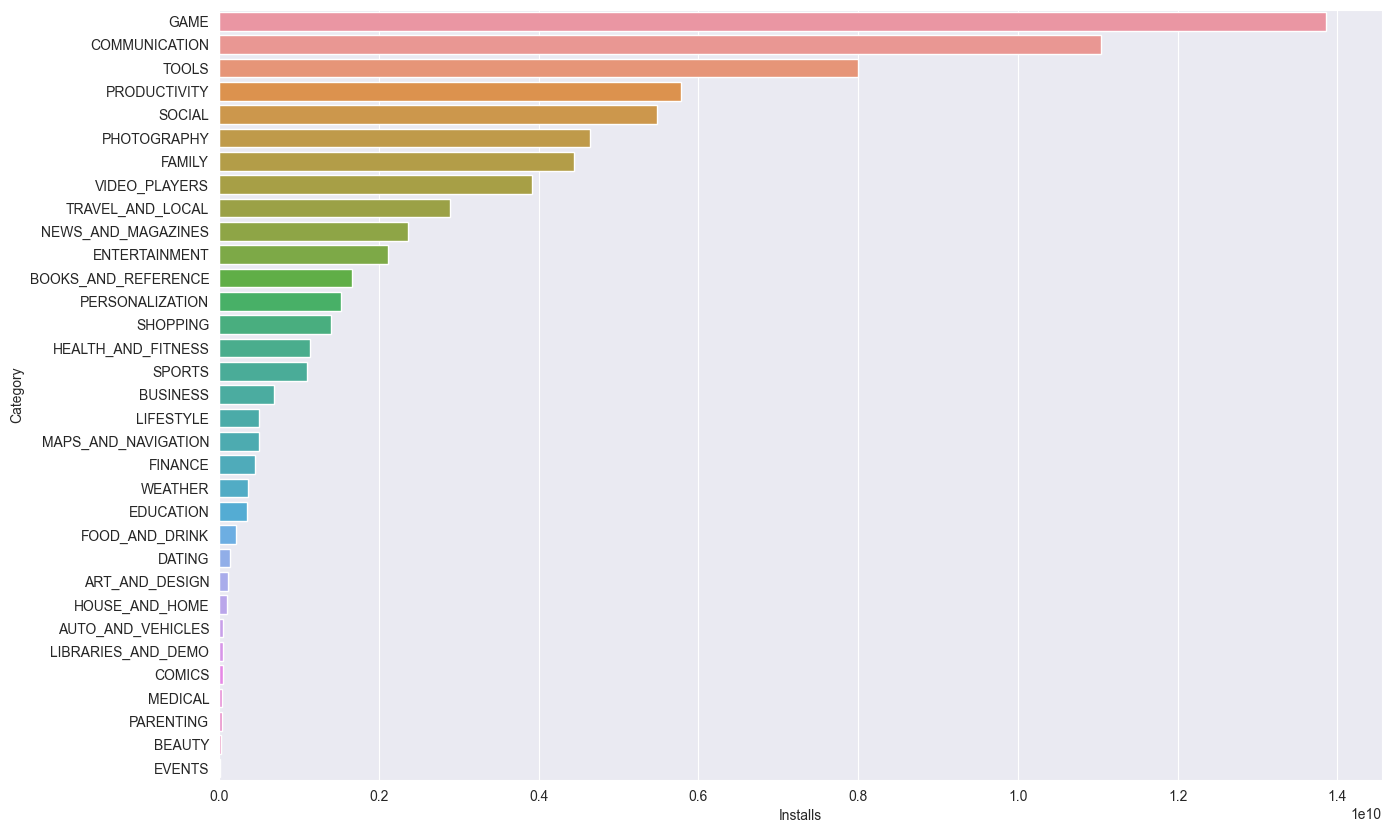

In [35]:
plt.figure(figsize = (15, 10))
a = df.groupby('Category').agg(dict(Installs = pd.Series.sum)).sort_values('Installs', ascending = False)
sns.barplot(a, x = 'Installs', y = a.index)

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [36]:
a = df.groupby('Category').agg(dict(Installs = pd.Series.sum, App = pd.Series.count))
px.scatter(a, x = 'App', y = 'Installs', color = 'Installs', size = 'App', hover_name = a.index)

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [37]:
df['Genres'].nunique()

114

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [38]:
a = df['Genres'].str.split(';', expand = True).stack()
px.bar(a.value_counts(), color = a.value_counts(), color_continuous_scale = 'viridis')

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

<Axes: xlabel='Category', ylabel='App'>

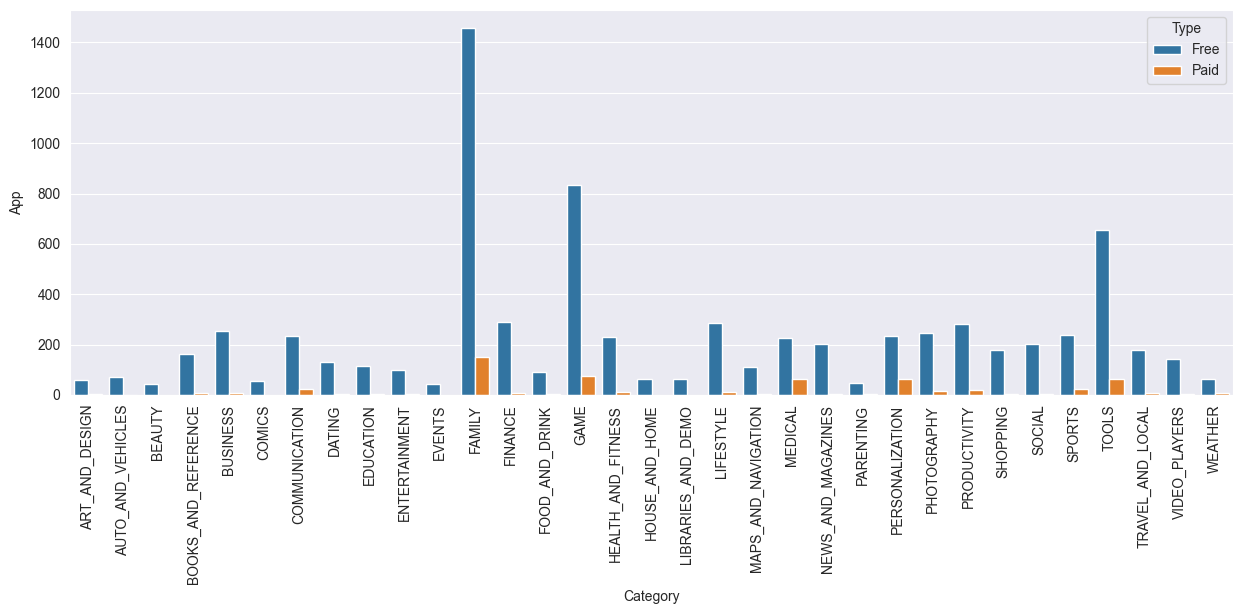

In [39]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
df.groupby(['Category', 'Type']).agg(dict(App = pd.Series.count)).reset_index()
sns.barplot(df.groupby(['Category', 'Type']).agg(dict(App = pd.Series.count)).reset_index(),
            x = 'Category', y = 'App', hue = 'Type')

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


<Axes: xlabel='Type', ylabel='Installs'>

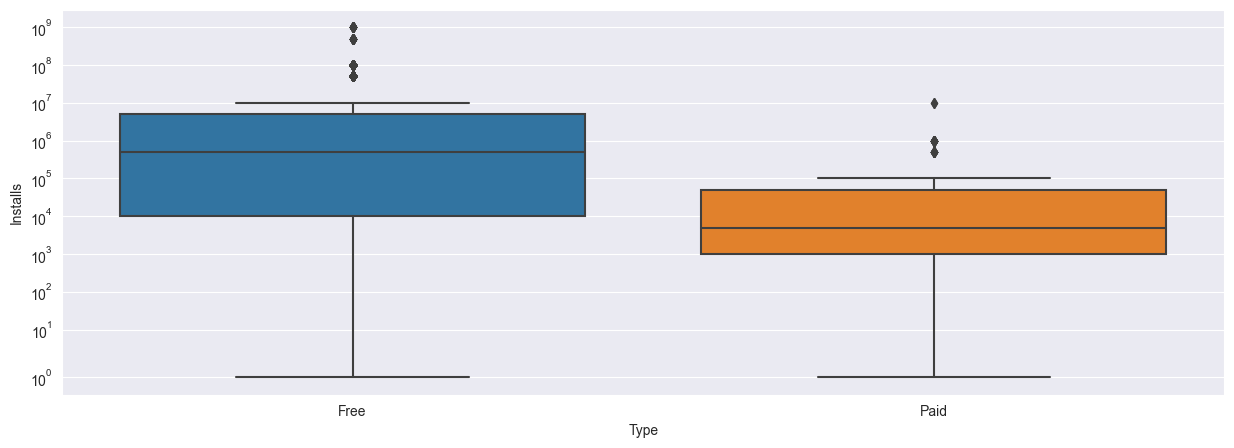

In [40]:
plt.figure(figsize = (15, 5))
plt.yscale('symlog')
sns.boxplot(df, x = 'Type', y = 'Installs')

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

<Axes: xlabel='Category', ylabel='Revenue_Estimate'>

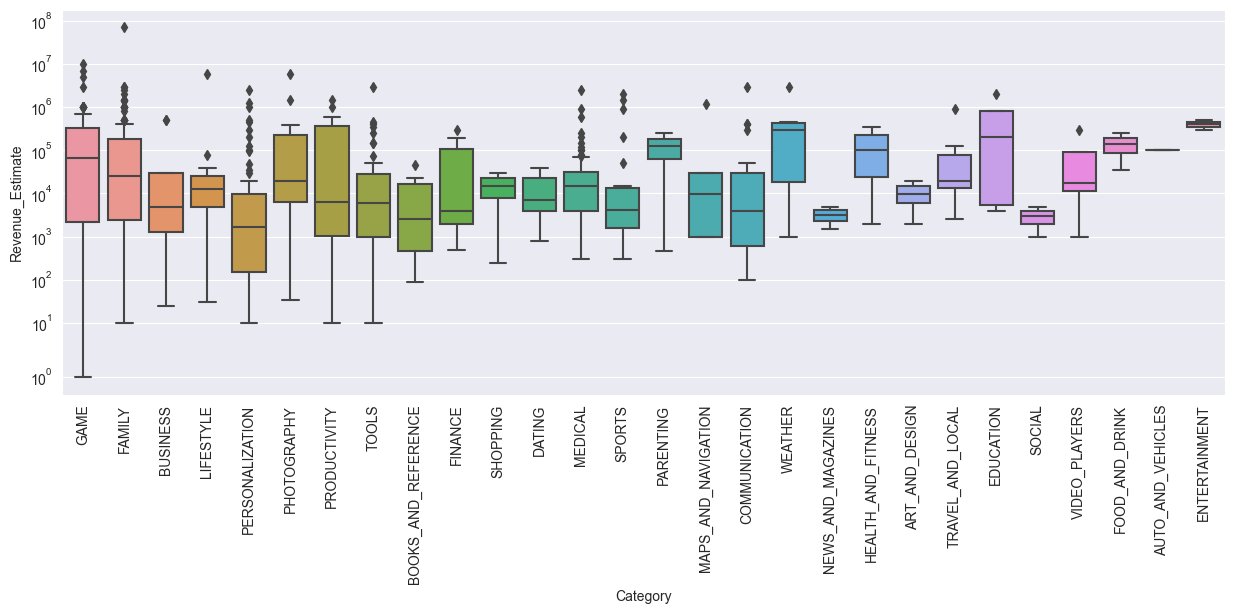

In [41]:
plt.figure(figsize = (15, 5))
plt.yscale('symlog')
plt.xticks(rotation = 90)
sns.boxplot(df.loc[lambda x: x['Type'] == 'Paid'], x = 'Category', y = 'Revenue_Estimate')

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [42]:
df.loc[lambda x: x['Type'] == 'Paid']['Price'].median()

2.99

<Axes: xlabel='Category', ylabel='Price'>

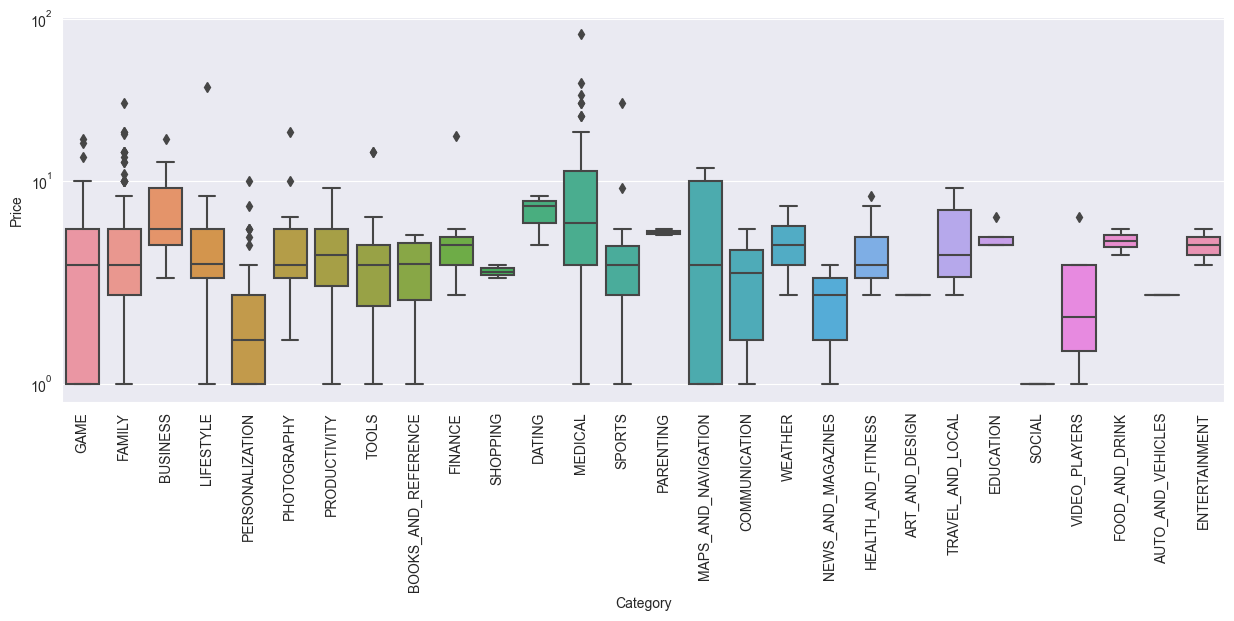

In [43]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.yscale('symlog')
sns.boxplot(df.loc[lambda x: x['Type'] == 'Paid'], x = 'Category', y = 'Price')